# Forecasting NIFTY50(^NSEI) Stock Price Using ARIMA Model

### _Programming Language: R_

 _by_ _**PRADIPTA GHOSH**_ <br>
**B.Sc. Statistics,T.D.B. College,Raniganj<br>**_Kazi Nazrul University, Asansol<br>_
Univ. Reg. no.:**KNU20114004170**<br>
Course code: **BSCHSTSDSE603**

## Introduction:
**In this project, we will use an ARIMA model to forecast the stock price of NIFTY50, which is the benchmark index of the National Stock Exchange of India. We will start by loading the necessary libraries and data, followed by cleaning and transforming the data to create a time series object. We will then check for stationarity of the time series and difference it to achieve stationarity if necessary. After that, we will use the auto.arima() function to select the best fit model and forecast the stock price for the next 100 days.**

## Methodology:

### 1) Load necessary libraries:
We will load the "urca" and "forecast" libraries using the code snippet below:

In [1]:
install.packages("urca")
install.packages("forecast")

library(urca)
library(forecast)


  There is a binary version available but the source version is later:
     binary source needs_compilation
urca  1.3-0  1.3-3              TRUE

  Binaries will be installed
package 'urca' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'urca'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying G:\Anaconda3\Lib\R\library\00LOCK\urca\libs\x64\urca.dll.conda_trash to G:\Anaconda3\Lib\R\library\urca\libs\x64\urca.dll.conda_trash: Permission denied"Warning message:
"restored 'urca'"


The downloaded binary packages are in
	C:\Users\dddee\AppData\Local\Temp\RtmpAXEEQy\downloaded_packages

  There is a binary version available but the source version is later:
         binary source needs_compilation
forecast   8.14   8.21              TRUE

  Binaries will be installed
package 'forecast' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\dddee\AppData\Local\Temp\RtmpAXEEQy\downloaded_packages


Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


### 2) Load data:
We will load the NIFTY50 stock price data from a CSV file and convert the date column to the Date format using the code snippet below:

In [2]:
nifty50 <- read.csv("NSEI.csv", header = TRUE, stringsAsFactors = FALSE)
nifty50$Date <- as.Date(nifty50$Date, format = "%Y-%m-%d")

### 3) Convert the Close price column to numeric format:
The Close price column is loaded as a character column, so we will convert it to numeric format for further analysis using the code snippet below:

In [3]:
nifty50$Close <- as.numeric(nifty50$Close)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

### 4) Remove rows with missing values:
We will remove any rows that have missing values using the code snippet below:

In [4]:
nifty50 <- nifty50[complete.cases(nifty50),]

### 5) Create a time series object:
We will create a time series object using the Close price column, starting from April 2014 with a frequency of 252 trading days per year using the code snippet below:

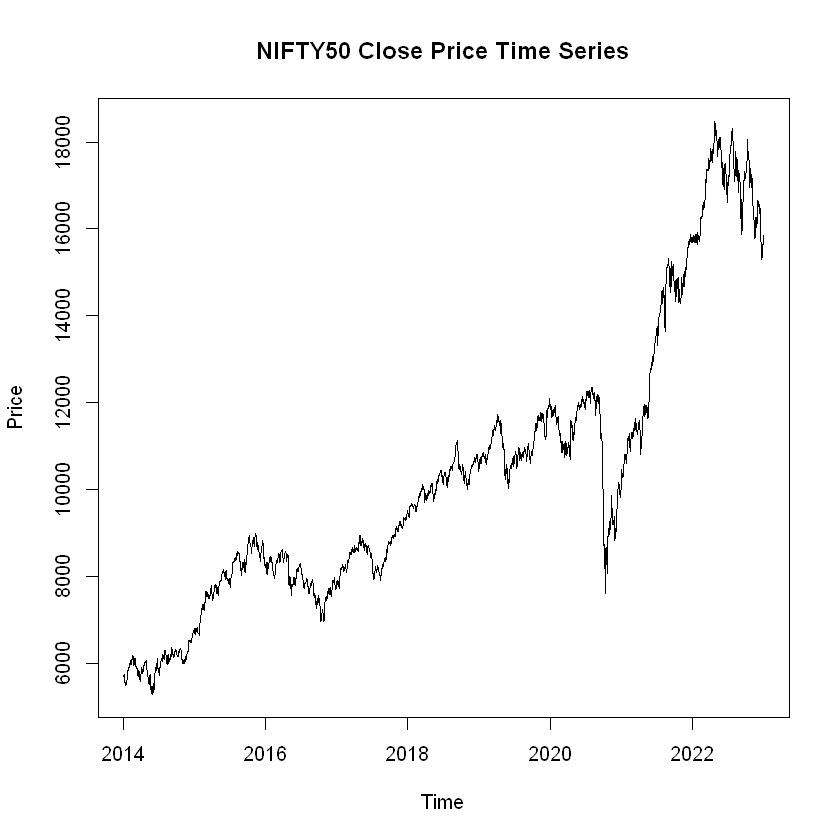

In [5]:
nifty50_ts <- ts(nifty50$Close, start = c(2014, 4), end = c(2023,3), frequency = 252)
plot(nifty50_ts, main = "NIFTY50 Close Price Time Series", ylab="Price")

### 6) Check for stationarity using Augmented Dickey-Fuller (ADF) test:
We will perform the ADF test to check if the time series is stationary using the code snippet below:

In [6]:
adf_test <- ur.df(nifty50_ts, type = "trend", selectlags = "AIC")
summary(adf_test)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1165.04   -50.81     1.92    57.70   685.50 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 25.427447  11.171009   2.276   0.0229 *
z.lag.1     -0.004229   0.001916  -2.208   0.0273 *
tt           0.019993   0.009382   2.131   0.0332 *
z.diff.lag   0.015212   0.021024   0.724   0.4694  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 116.3 on 2262 degrees of freedom
Multiple R-squared:  0.002354,	Adjusted R-squared:  0.00103 
F-statistic: 1.779 on 3 and 2262 DF,  p-value: 0.1491


Value of test-statistic is: -2.208 2.716 2.4727 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -3.96 -3.41 -3.12
phi2  6.09 

### 7) Difference the time series to achieve stationarity:
If the time series is not stationary, we will difference it to achieve stationarity using the code snippet below:

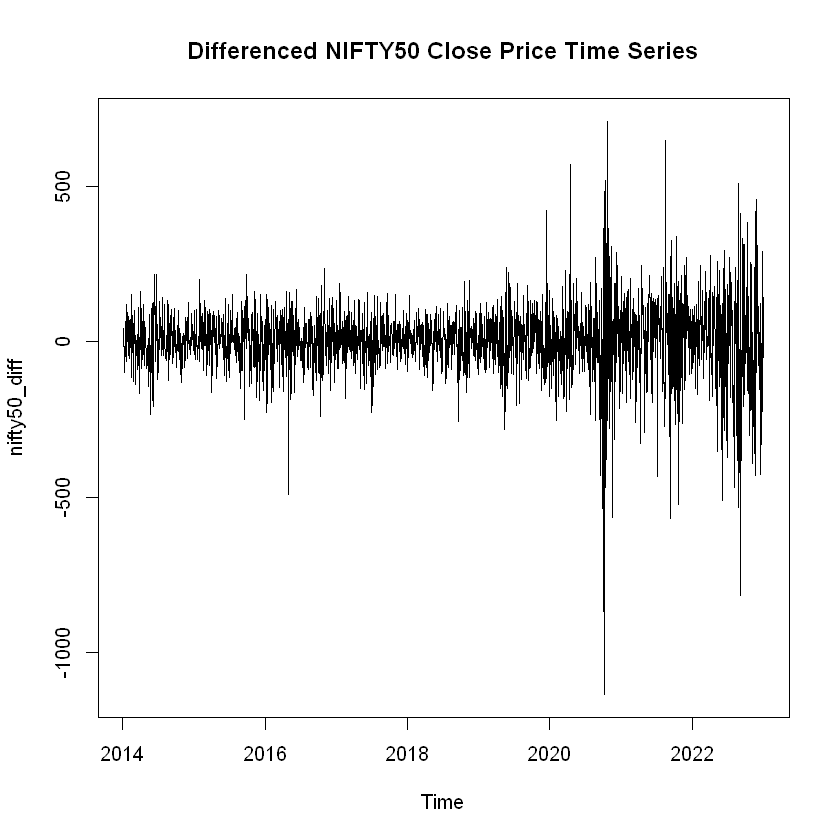

In [7]:
nifty50_diff <- diff(nifty50_ts, differences = 1)
plot(nifty50_diff, main = "Differenced NIFTY50 Close Price Time Series")

### 8) Check for stationarity of the differenced time series:

In [8]:
adf_test_diff <- ur.df(nifty50_diff, type = "trend", selectlags = "AIC")
summary(adf_test_diff)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1150.01   -50.34     2.38    57.90   700.07 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.4479205  4.8998162   0.704    0.482    
z.lag.1     -1.0028507  0.0295401 -33.949   <2e-16 ***
tt           0.0009133  0.0037426   0.244    0.807    
z.diff.lag   0.0162682  0.0210262   0.774    0.439    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 116.5 on 2261 degrees of freedom
Multiple R-squared:  0.4936,	Adjusted R-squared:  0.4929 
F-statistic: 734.5 on 3 and 2261 DF,  p-value: < 2.2e-16


Value of test-statistic is: -33.9488 384.1737 576.2606 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -3.96 -

### 9) Use auto.arima() to select the best fit model:
We will use the auto.arima() function to select the best fit model for our time series using the code snippet below:

In [9]:
nifty50_arima <- auto.arima(nifty50_ts, D = 1, trace = TRUE)
nifty50_arima


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2)(1,1,1)[252]                    : Inf
 ARIMA(0,1,0)(0,1,0)[252]                    : 23596.67
 ARIMA(1,1,0)(1,1,0)[252]                    : Inf
 ARIMA(0,1,1)(0,1,1)[252]                    : Inf
 ARIMA(0,1,0)(1,1,0)[252]                    : Inf
 ARIMA(0,1,0)(0,1,1)[252]                    : Inf
 ARIMA(0,1,0)(1,1,1)[252]                    : Inf
 ARIMA(1,1,0)(0,1,0)[252]                    : 23599.35
 ARIMA(0,1,1)(0,1,0)[252]                    : 23598.51
 ARIMA(1,1,1)(0,1,0)[252]                    : 23601.36

 Now re-fitting the best model(s) without approximations...

 ARIMA(0,1,0)(0,1,0)[252]                    : 26162.7

 Best model: ARIMA(0,1,0)(0,1,0)[252]                    



Series: nifty50_ts 
ARIMA(0,1,0)(0,1,0)[252] 

sigma^2 estimated as 25374:  log likelihood=-13080.35
AIC=26162.7   AICc=26162.7   BIC=26168.31

### 10) Forecast the next 100 days of the NIFTY50 stock price:
We will use the forecast() function to forecast the stock price for the next 100 trading days using the code snippet below:

In [10]:
nifty50_forecast <- forecast(nifty50_arima, h = 100)

### 11) Plot the forecasted values:
We will plot the forecasted values to visualize the future trend of the NIFTY50 stock price using the code snippet below:

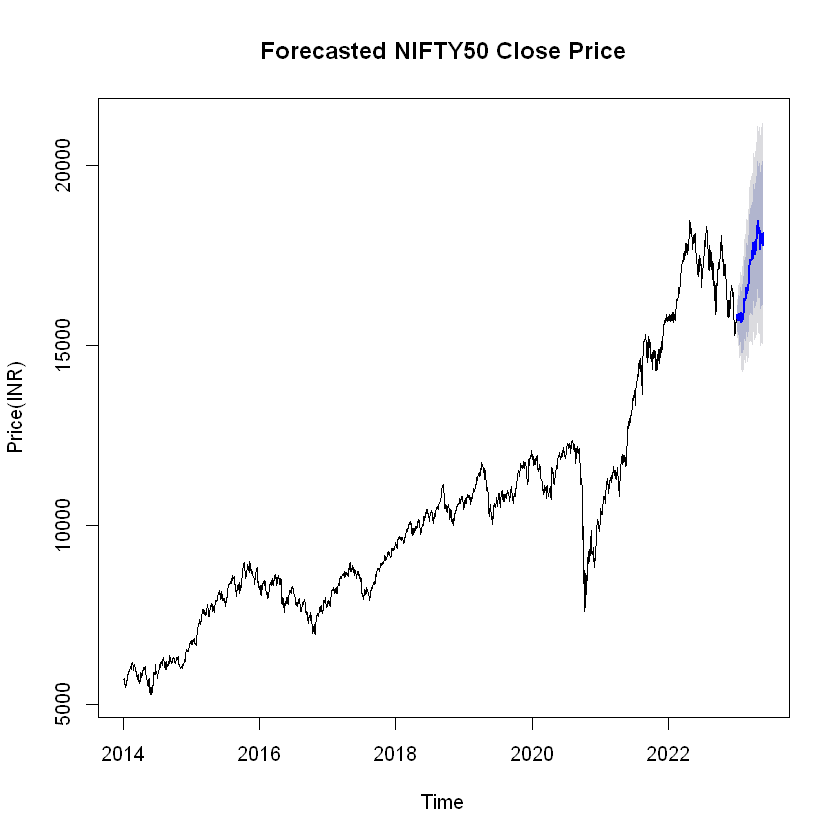

In [13]:
plot(nifty50_forecast, main = "Forecasted NIFTY50 Close Price", xlab="Time", ylab="Price(INR)")

## Results:

**The ADF test shows that the original time series is not stationary, so we perform first order differencing to achieve stationarity. The auto.arima() function selects an ARIMA(0,1,0) model as the best fit model for our time series. The forecasted values plot shows that the NIFTY50(^NSEI) stock price is expected to have a gradual upward trend for the next 100 trading days.**

## Conclusion:

*In this project, we used an ARIMA model to forecast the stock price of NIFTY50. We checked for stationarity of the time series and used differencing to achieve stationarity if necessary. We selected the best fit model using the auto.arima() function and forecasted the stock price for the next 100 trading days. The forecasted values plot shows that the NIFTY50 stock price is expected to have a gradual upward trend for the next 100 trading days.*